<b> Problem Statement </b>

# Make a machine learning model to predict the price of a house that to be sold

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# Exploratry Data Analysis

In [13]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [15]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Observations
# Uni-Variate Analysis

In [3]:
cols = df.columns
cols

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [4]:
df['Avg. Area Number of Rooms'].unique()

array([7.00918814, 6.73082102, 8.51272743, ..., 4.80508098, 7.13014386,
       6.7923361 ])

In [5]:
df['Price'].nunique()

5000

In [6]:
df.apply(lambda x:x.unique(), axis = 0)

Avg. Area Income                [79545.45857431678, 79248.64245482568, 61287.0...
Avg. Area House Age             [5.682861321615587, 6.0028998082752425, 5.8658...
Avg. Area Number of Rooms       [7.009188142792237, 6.730821019094919, 8.51272...
Avg. Area Number of Bedrooms    [4.09, 3.09, 5.13, 3.26, 4.23, 4.04, 3.41, 2.4...
Area Population                 [23086.800502686456, 40173.07217364482, 36882....
Price                           [1059033.5578701235, 1505890.91484695, 1058987...
Address                         [208 Michael Ferry Apt. 674\nLaurabury, NE 370...
dtype: object

In [7]:
for i in cols:
    print(i,'---->',df[i].unique())

Avg. Area Income ----> [79545.45857432 79248.64245483 61287.06717866 ... 63390.6868855
 68001.33123509 65510.58180367]
Avg. Area House Age ----> [5.68286132 6.00289981 5.86588984 ... 7.25059061 5.53438842 5.99230531]
Avg. Area Number of Rooms ----> [7.00918814 6.73082102 8.51272743 ... 4.80508098 7.13014386 6.7923361 ]
Avg. Area Number of Bedrooms ----> [4.09 3.09 5.13 3.26 4.23 4.04 3.41 2.42 2.3  6.1  4.1  4.49 3.1  2.27
 4.37 4.01 3.12 4.3  5.12 5.49 4.07 2.1  4.31 6.34 4.33 2.03 4.   3.04
 3.24 4.42 5.36 6.29 6.   2.07 3.01 2.39 2.5  2.17 6.3  4.43 4.44 6.32
 3.18 6.35 3.22 2.13 4.02 6.36 3.32 4.12 6.41 5.08 3.06 2.28 4.2  4.32
 5.43 3.13 3.28 3.27 3.08 3.17 3.15 6.25 3.43 4.38 6.16 4.28 4.11 6.24
 3.35 4.48 3.2  3.07 3.39 3.38 6.06 3.3  3.46 3.33 4.41 2.38 2.37 3.45
 2.02 2.14 2.23 2.44 2.29 4.19 6.04 5.28 5.1  5.45 4.36 2.05 6.39 4.45
 4.22 6.44 4.35 3.37 6.2  6.19 2.49 2.04 4.46 5.15 3.21 6.45 3.44 2.18
 3.49 6.26 4.14 4.27 5.04 4.06 6.4  3.25 5.33 3.   2.47 3.31 3.14 4.18
 5.07

# Observations

In [ ]:
1.
2.
3.
4.
5.

In [8]:
df['Avg. Area Income'].value_counts()

78757.681982    1
78293.703561    1
61654.698883    1
48176.226398    1
66678.062167    1
               ..
66039.622184    1
60769.987333    1
77620.921149    1
63797.578521    1
61369.483153    1
Name: Avg. Area Income, Length: 5000, dtype: int64

<AxesSubplot:>

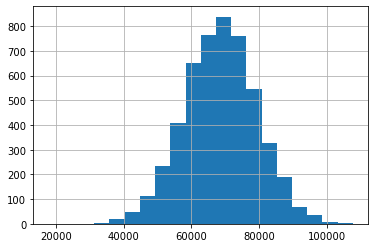

In [9]:
df['Avg. Area Income'].hist(bins=20)

<AxesSubplot:>

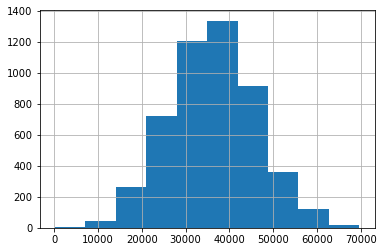

In [10]:
df['Area Population'].hist()

<AxesSubplot:>

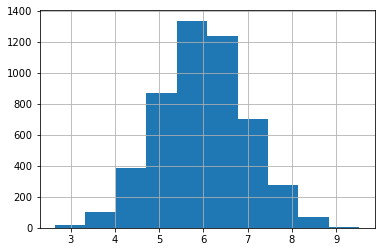

In [11]:
df['Avg. Area House Age'].hist()

<AxesSubplot:ylabel='Density'>

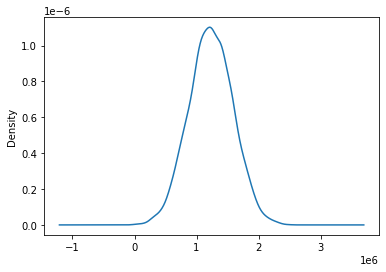

In [12]:
df['Price'].plot.kde()

# Groupby to Compare the basis of Something by row

In [13]:
df.groupby('Price').describe().T

Price                               1.593866e+04  3.114052e+04  8.859177e+04  \
Avg. Area Income             count      1.000000      1.000000      1.000000   
                             mean   47320.657205  37971.207566  60167.672607   
                             std             NaN           NaN           NaN   
                             min    47320.657205  37971.207566  60167.672607   
                             25%    47320.657205  37971.207566  60167.672607   
                             50%    47320.657205  37971.207566  60167.672607   
                             75%    47320.657205  37971.207566  60167.672607   
                             max    47320.657205  37971.207566  60167.672607   
Avg. Area House Age          count      1.000000      1.000000      1.000000   
                             mean       3.558054      4.291224      4.590613   
                             std             NaN           NaN           NaN   
                             min        3.558054      4.291224      4.590613   
                             25%        3.558054      4.291224      4.590613   
                             50%        3.558054      4.291224      4.590613   
                             75%        3.558054      4.291224      4.590613   
                             max        3.558054      4.291224      4.590613   
Avg. Area Number of Rooms    count      1.000000      1.000000      1.000000   
                             mean       7.006987      5.807510      3.950973   
                             std             NaN           NaN           NaN   
                             min        7.006987      5.807510      3.950973   
                             25%        7.006987      5.807510      3.950973   
                             50%        7.006987      5.807510      3.950973   
                             75%        7.006987      5.807510      3.950973   
                             max        7.006987      5.807510      3.950973   
Avg. Area Number of Bedrooms count      1.000000      1.000000      1.000000   
                             mean       3.160000      3.240000      4.060000   
                             std             NaN           NaN           NaN   
                             min        3.160000      3.240000      4.060000   
                             25%        3.160000      3.240000      4.060000   
                             50%        3.160000      3.240000      4.060000   
                             75%        3.160000      3.240000      4.060000   
                             max        3.160000      3.240000      4.060000   
Area Population              count      1.000000      1.000000      1.000000   
                             mean   15776.618595  33267.767728  16811.303292   
                             std             NaN           NaN           NaN   
                             min    15776.618595  33267.767728  16811.303292   
                             25%    15776.618595  33267.767728  16811.303292   
                             50%    15776.618595  33267.767728  16811.303292   
                             75%    15776.618595  33267.767728  16811.303292   
                             max    15776.618595  33267.767728  16811.303292   

Price                               1.430274e+05  1.515271e+05  1.520719e+05  \
Avg. Area Income             count      1.000000      1.000000      1.000000   
                             mean   35963.330809  48735.924512  40366.616291   
                             std             NaN           NaN           NaN   
                             min    35963.330809  48735.924512  40366.616291   
                             25%    35963.330809  48735.924512  40366.616291   
                             50%    35963.330809  48735.924512  40366.616291   
                             75%    35963.330809  48735.924512  40366.616291   
                             max    35963.330809  48735.924512  40366.616291   

0

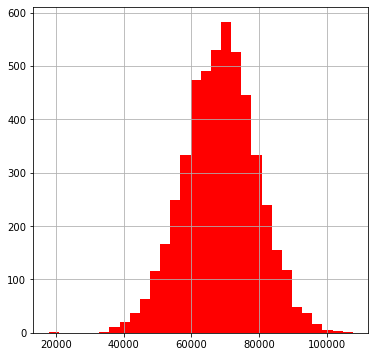

In [17]:
plt.figure(figsize=(6,6))
plt.hist(df['Avg. Area Income'],bins=30,color='red')
plt.grid()
0

In [18]:
for i in df.columns[::-1]:
    df[i].hist(bins=20)
    plt.title(i)
    plt.show()

KeyboardInterrupt: 

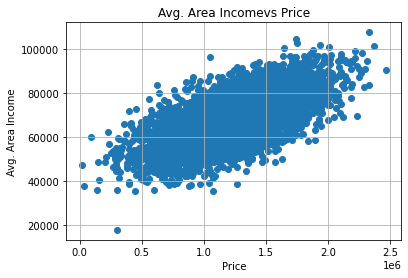

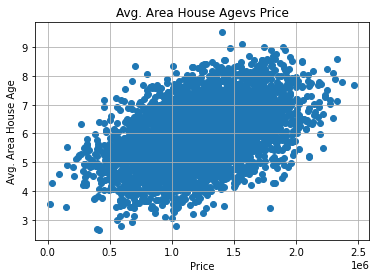

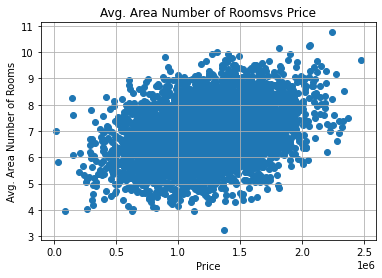

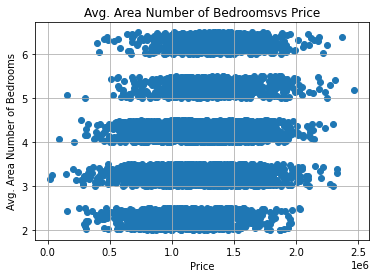

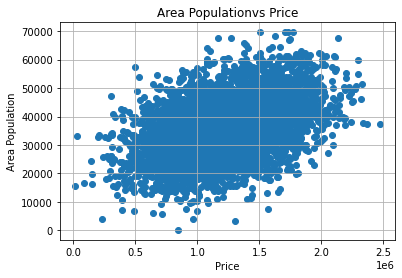

In [15]:
for i in df.columns[:-2]:
    plt.scatter(df['Price'],df[i])
    plt.xlabel('Price')
    plt.ylabel(i)
    plt.title(i + 'vs Price')
    plt.grid()
    plt.show()

In [87]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


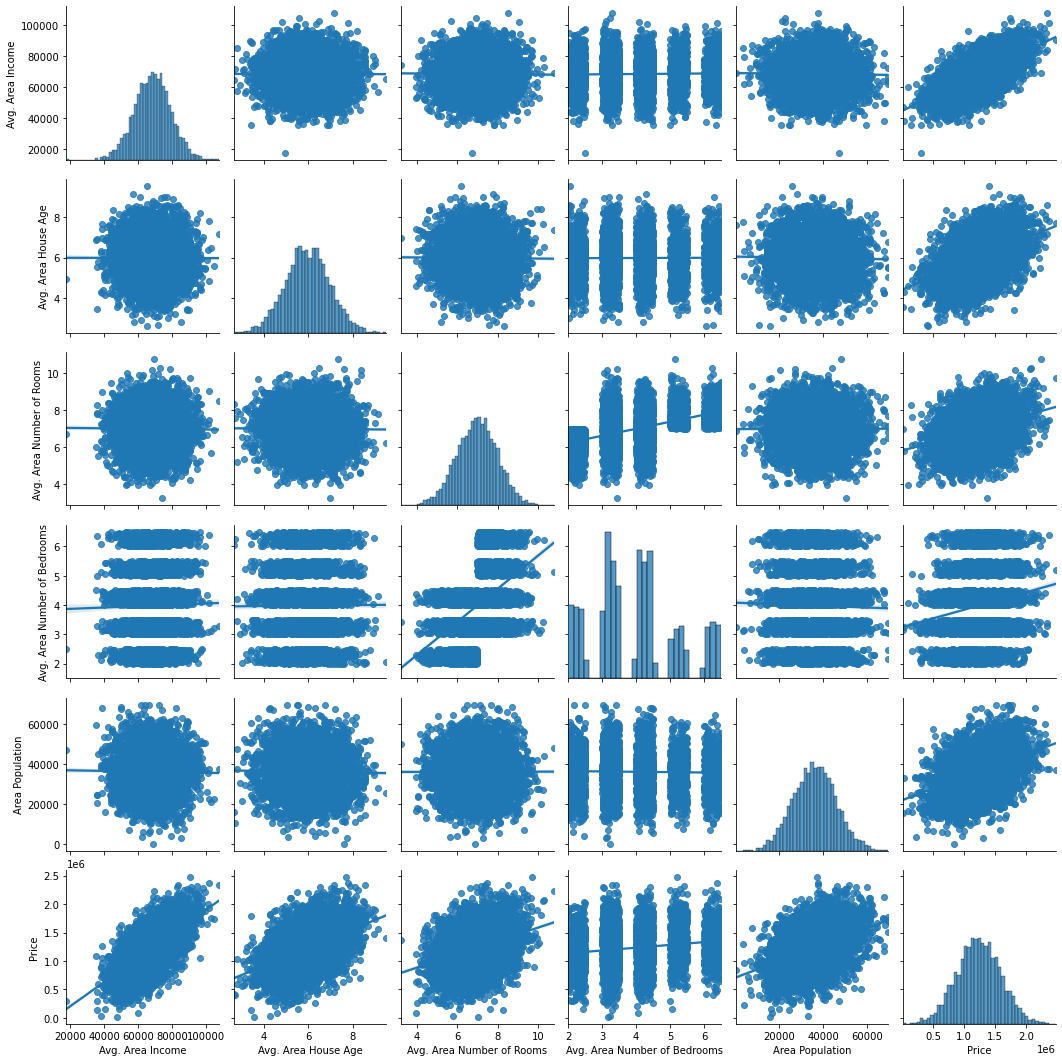

In [20]:
import seaborn as sns
sns.pairplot(df,kind='reg')

In [27]:
df['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [28]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [42]:
x = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]
y=df['Price']

In [43]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           5000 non-null   float64
 1   Avg. Area House Age        5000 non-null   float64
 2   Avg. Area Number of Rooms  5000 non-null   float64
 3   Area Population            5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


# 1.Spliting the Data

In [45]:
from sklearn.model_selection import train_test_split

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state=10)

In [54]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 245 to 1234
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [55]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 245 to 1234
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [59]:
ytrain.shape

(3750,)

In [61]:
ytest.shape

(1250,)

# 2.Creating the Machine Learning Model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()

# 3.Training The Model With Training Data

In [64]:
model.fit(xtrain,ytrain)

LinearRegression()

In [65]:
model.coef_

array([2.15919468e+01, 1.65128318e+05, 1.20463708e+05, 1.53368278e+01])

In [66]:
pd.DataFrame(model.coef_,columns=['coef.'], index=x.columns)

,coef.
Avg. Area Income,21.591947
Avg. Area House Age,165128.317665
Avg. Area Number of Rooms,120463.708087
Area Population,15.336828


# 4.Evaluation

In [67]:
print('%.1f%%'%(model.score(xtest,ytest) * 100))

91.8%


In [68]:
ypred = model.predict(xtest)

In [69]:
ypred

array([1193899.36335106, 1187262.43784593, 1046347.43872965, ...,
        769979.21424073, 1588323.12890357, 1732539.85447352])

In [70]:
ytest

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
            ...     
4274    1.779858e+06
2551    1.404541e+06
2476    9.143783e+05
3711    1.479296e+06
1234    1.747245e+06
Name: Price, Length: 1250, dtype: float64

In [71]:
from sklearn.metrics import mean_absolute_error

In [72]:
print (mean_absolute_error(ytest,ypred))

80728.01465731302


In [73]:
ypred[0]

1193899.3633510587

In [74]:
100 * mean_absolute_error(ytest,ypred)/ypred[0]

6.761710168830658

accuracy = 1 - error
error = 1 - accuracy 

# Conclusion: Lets use this model, because the accuracy score is more than 90%

# 5.Deployment

In [82]:
final_model = model

In [85]:
model = pd.to_pickle(final_model,'HousePricePredictor')

In [86]:
model